<a href="https://colab.research.google.com/github/alanjose01/ML-PROJECT/blob/main/CClasspriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

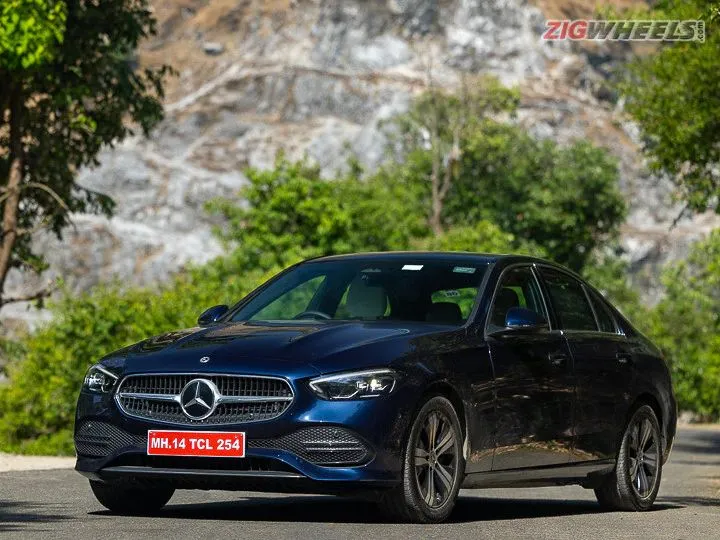

 The Mercedes-Benz C-Class is a line of luxury compact cars produced by the renowned German automaker, Mercedes-Benz. It sits in the middle of the Mercedes-Benz lineup, offering a blend of performance, luxury, and advanced technology.

## **Data** **Loading**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/content/unclean cclass.csv')
df

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
4001,C Class,2017.0,"£14,700",Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
4002,C Class,2018.0,"£18,500",Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
4003,C Class,2014.0,"£11,900",Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
4004,C Class,2014.0,"£11,300",Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


In [ ]:
df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


In [ ]:
df.tail()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
4001,C Class,2017.0,"£14,700",Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
4002,C Class,2018.0,"£18,500",Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
4003,C Class,2014.0,"£11,900",Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
4004,C Class,2014.0,"£11,300",Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481
4005,C Class,2014.0,"£14,800",Automatic,"55,445",37,£30,64.2,Diesel,2.143,/ad/25154247


In [ ]:
#checking the summary of the original dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3907 non-null   object 
 1   year          3904 non-null   float64
 2   price         3907 non-null   object 
 3   transmission  3907 non-null   object 
 4   mileage       3808 non-null   object 
 5   fuel type     1329 non-null   object 
 6   engine size   3842 non-null   object 
 7   mileage2      3890 non-null   object 
 8   fuel type2    3808 non-null   object 
 9   engine size2  3808 non-null   object 
 10  reference     3907 non-null   object 
dtypes: float64(1), object(10)
memory usage: 344.4+ KB


**Data** **Preparation**

In [ ]:
# to find missing values
df.isna().sum()

model             99
year             102
price             99
transmission      99
mileage          198
fuel type       2677
engine size      164
mileage2         116
fuel type2       198
engine size2     198
reference         99
dtype: int64

In [ ]:
#deleting the rows where all values are missing and Re-indexing
df.dropna(how="all",inplace=True)
df.reset_index(drop=True,inplace=True)
df

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,"£14,700",Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
3903,C Class,2018.0,"£18,500",Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
3904,C Class,2014.0,"£11,900",Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
3905,C Class,2014.0,"£11,300",Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


In [ ]:
 #removing the currency symbol and the comma character
df.price=df.price.apply(lambda x: str. replace(x,'£',''))
df.price=df.price.apply(lambda x: str. replace(x,',',''))

In [ ]:
#converting the price column to int data type
df.price=pd.to_numeric(df.price)

In [ ]:
# column names before changing
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuel type',
       'engine size', 'mileage2', 'fuel type2', 'engine size2', 'reference'],
      dtype='object')

In [ ]:
# replacing the space between the column names with underscore
# df.rename(columns=lambda s: s.replace(" ","_"),inplace=True)

In [ ]:
# for manual renaming
df.rename(columns={'fuel type': 'fuel_type','fuel type2': 'fuel_type2','engine size':'engine_size','engine size2':'engine_size2'},inplace=True)

In [ ]:
# checking the modified columns
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuel_type',
       'engine_size', 'mileage2', 'fuel_type2', 'engine_size2', 'reference'],
      dtype='object')

In [ ]:
df.isna().sum()

model              0
year               3
price              0
transmission       0
mileage           99
fuel_type       2578
engine_size       65
mileage2          17
fuel_type2        99
engine_size2      99
reference          0
dtype: int64

Handling missing values

In [ ]:
# fuel type
# filling the missing values in fuel_type2 column with values from column fuel_type
df.fuel_type2.fillna(df.fuel_type,inplace=True)

# dropping the excess column "fuel_type"
df.drop(columns='fuel_type',inplace=True)

# renaming the remaining column
df.rename(columns={'fuel_type2':'fuel_type'},inplace=True)
df

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,2,"4,500",Diesel,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,"31,357",£150,70.6,Diesel,1.598,/ad/25451436
3903,C Class,2018.0,18500,Automatic,"28,248",£150,64.2,Diesel,2.143,/ad/25451481
3904,C Class,2014.0,11900,Manual,"48,055",£20,65.7,Diesel,2.143,/ad/25057204
3905,C Class,2014.0,11300,Automatic,"49,865",£145,56.5,Diesel,2.143,/ad/25144481


In [ ]:
# mileage
# mileage has more complete data than mileage2. thus,we retained mileage ad fill
df.mileage.fillna(df.mileage2,inplace=True)

In [ ]:
# removing the comma format using str.replace() in the mileage column
df.mileage = df.mileage.apply(lambda x: str.replace(x,',',''))

In [ ]:
# converting mileage into numeric
df.mileage=pd.to_numeric(df.mileage,errors='coerce')

In [ ]:
# droping the mileage2 column
df.drop(columns='mileage2',inplace=True)

In [ ]:
df

,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,2,Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,1.5,Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,2,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,2,Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,2,Diesel,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,31357.0,£150,Diesel,1.598,/ad/25451436
3903,C Class,2018.0,18500,Automatic,28248.0,£150,Diesel,2.143,/ad/25451481
3904,C Class,2014.0,11900,Manual,48055.0,£20,Diesel,2.143,/ad/25057204
3905,C Class,2014.0,11300,Automatic,49865.0,£145,Diesel,2.143,/ad/25144481


In [ ]:
# engine
# filling the missing values in engine_size2 with values from the engine_size column
df.engine_size2.fillna(df.engine_size,inplace=True)

In [ ]:
# converting engine_size2 into numeric
df.engine_size2=pd.to_numeric(df.engine_size2,errors="coerce")

In [ ]:
 # standardizing the engine_size value
df.engine_size2=df.engine_size2.apply(lambda x: round(x/1000,1) if x>1000 else round(x,1))

In [ ]:
# dropping column engine_size
df.drop(columns='engine_size', inplace=True)

In [ ]:
# remaining engine_size2 into engine_size
df.rename(columns={'engine_size2':'engine_size'},inplace=True)

In [ ]:
df

,model,year,price,transmission,mileage,fuel_type,engine_size,reference
0,C Class,2020.0,30495,Automatic,1200.0,Diesel,2.0,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,Petrol,1.5,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,Diesel,2.0,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,Diesel,2.0,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,Diesel,2.0,/ad/24913660
...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,31357.0,Diesel,1.6,/ad/25451436
3903,C Class,2018.0,18500,Automatic,28248.0,Diesel,2.1,/ad/25451481
3904,C Class,2014.0,11900,Manual,48055.0,Diesel,2.1,/ad/25057204
3905,C Class,2014.0,11300,Automatic,49865.0,Diesel,2.1,/ad/25144481


Handling wrong datatypes


In [ ]:
# fuel_type
# removing the NaN values in the dataset and resetting the index
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df

,model,year,price,transmission,mileage,fuel_type,engine_size,reference
0,C Class,2020.0,30495,Automatic,1200.0,Diesel,2.0,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,Petrol,1.5,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,Diesel,2.0,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,Diesel,2.0,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,Diesel,2.0,/ad/24913660
...,...,...,...,...,...,...,...,...
3893,C Class,2017.0,14700,Manual,31357.0,Diesel,1.6,/ad/25451436
3894,C Class,2018.0,18500,Automatic,28248.0,Diesel,2.1,/ad/25451481
3895,C Class,2014.0,11900,Manual,48055.0,Diesel,2.1,/ad/25057204
3896,C Class,2014.0,11300,Automatic,49865.0,Diesel,2.1,/ad/25144481


In [ ]:
# convert column "year" from float to integer
df['year']=df['year'].round().astype('int64')
df

,model,year,price,transmission,mileage,fuel_type,engine_size,reference
0,C Class,2020,30495,Automatic,1200.0,Diesel,2.0,/ad/25017331
1,C Class,2020,29989,Automatic,1000.0,Petrol,1.5,/ad/25043746
2,C Class,2020,37899,Automatic,500.0,Diesel,2.0,/ad/25142894
3,C Class,2019,30399,Automatic,5000.0,Diesel,2.0,/ad/24942816
4,C Class,2019,29899,Automatic,4500.0,Diesel,2.0,/ad/24913660
...,...,...,...,...,...,...,...,...
3893,C Class,2017,14700,Manual,31357.0,Diesel,1.6,/ad/25451436
3894,C Class,2018,18500,Automatic,28248.0,Diesel,2.1,/ad/25451481
3895,C Class,2014,11900,Manual,48055.0,Diesel,2.1,/ad/25057204
3896,C Class,2014,11300,Automatic,49865.0,Diesel,2.1,/ad/25144481


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3898 non-null   object 
 1   year          3898 non-null   int64  
 2   price         3898 non-null   int64  
 3   transmission  3898 non-null   object 
 4   mileage       3898 non-null   float64
 5   fuel_type     3898 non-null   object 
 6   engine_size   3898 non-null   float64
 7   reference     3898 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 243.8+ KB


Handling unnecessary columns


In [ ]:
# dropping the model and references columns. they are irrelevant to the context
df.drop(columns=['model','reference'],inplace=True)

In [ ]:
df.isna().sum()

year            0
price           0
transmission    0
mileage         0
fuel_type       0
engine_size     0
dtype: int64

In [ ]:
df.columns

Index(['year', 'price', 'transmission', 'mileage', 'fuel_type', 'engine_size'], dtype='object')

<Axes: >

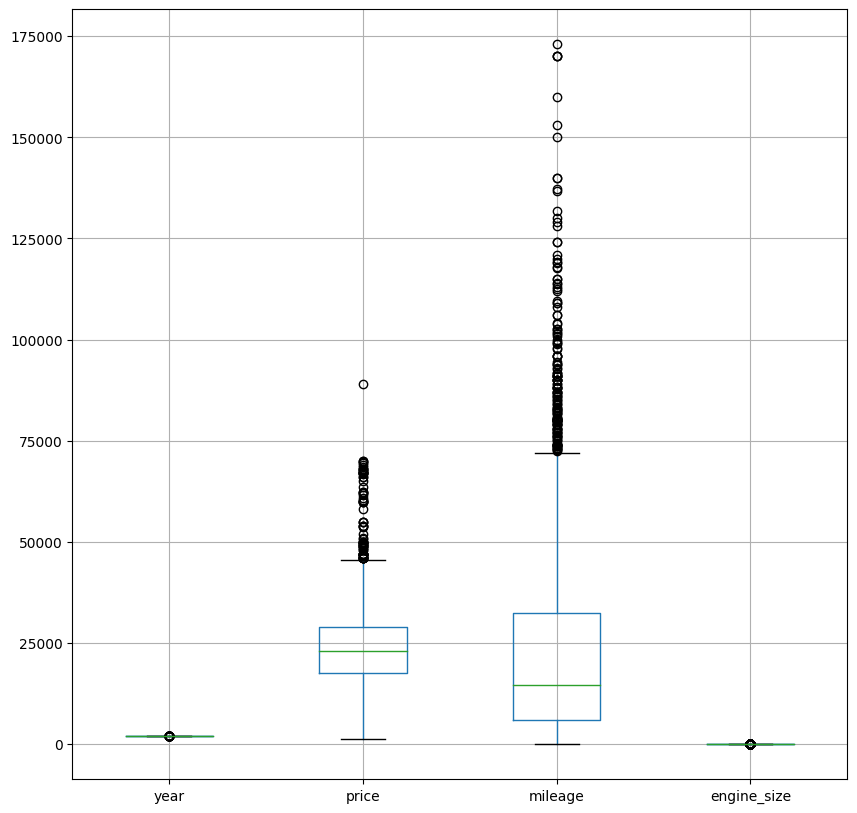

In [ ]:
# showing outliers
# Outliers are data points that are significantly different from the majority of the data in a dataset.

df.boxplot(figsize=(10,10))

In [ ]:
# Assuming df is your DataFrame
columns_to_fix = ['price', 'mileage']

for column_name in columns_to_fix:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Fix outliers by capping them at the upper and lower bounds
    df[column_name] = np.where(df[column_name] < lower_bound, lower_bound, df[column_name])
    df[column_name] = np.where(df[column_name] > upper_bound, upper_bound, df[column_name])

<Axes: >

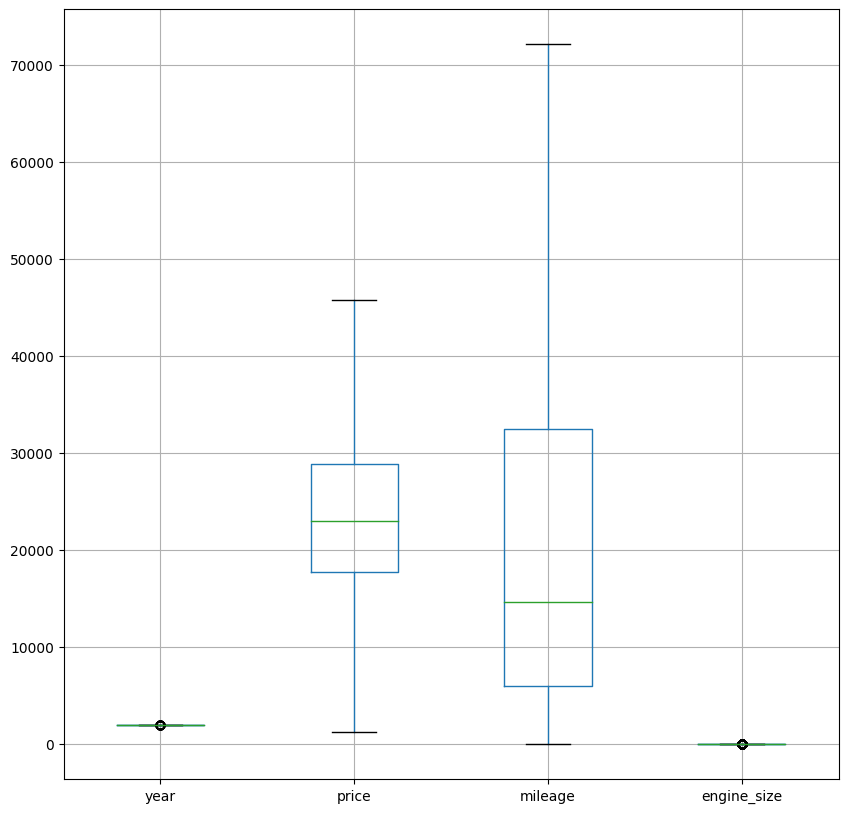

In [ ]:
# removing outliers
df.boxplot(figsize=(10,10))


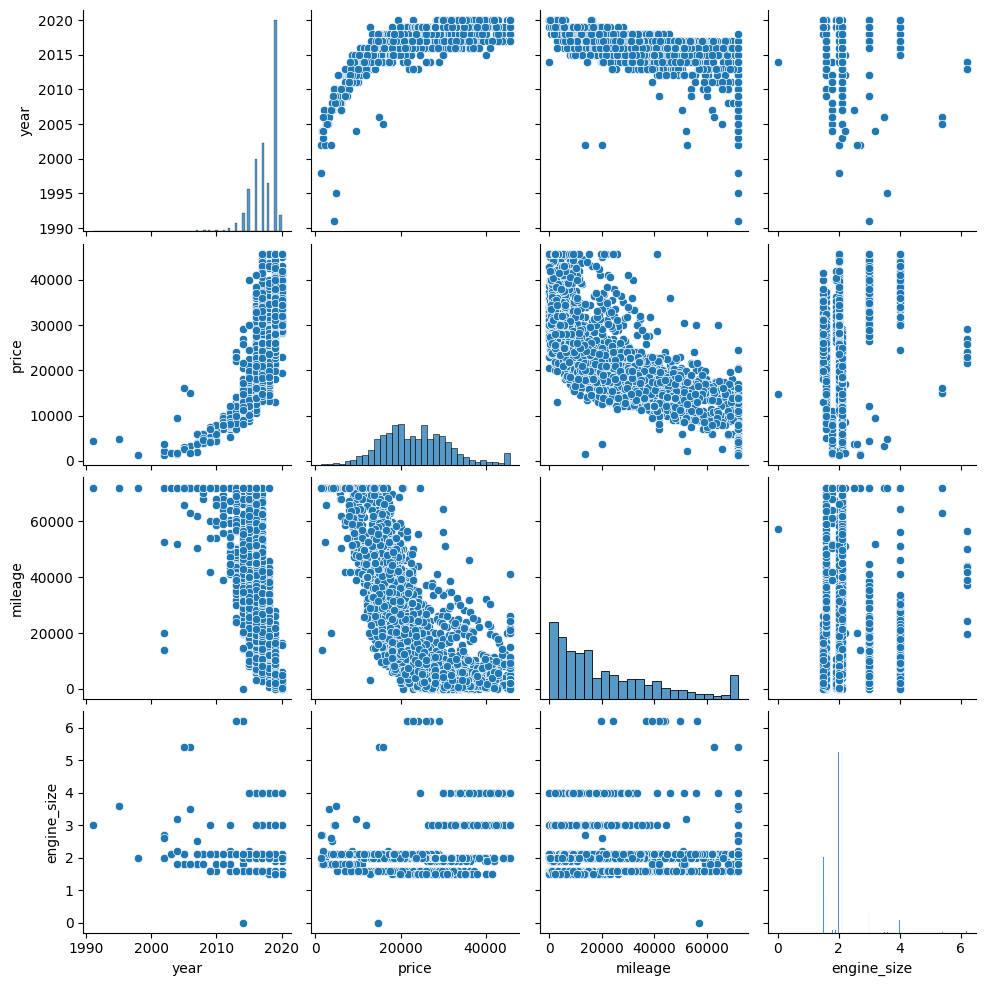

In [ ]:
# pair plot to visualize the summary of the dataset
sns.pairplot(df)

In [ ]:
# encoding
df1=pd.get_dummies(df)
df1

,year,price,mileage,engine_size,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
0,2020,30495.0,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020,29989.0,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020,37899.0,500.0,2.0,1,0,0,0,1,0,0,0
3,2019,30399.0,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019,29899.0,4500.0,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3893,2017,14700.0,31357.0,1.6,0,1,0,0,1,0,0,0
3894,2018,18500.0,28248.0,2.1,1,0,0,0,1,0,0,0
3895,2014,11900.0,48055.0,2.1,0,1,0,0,1,0,0,0
3896,2014,11300.0,49865.0,2.1,1,0,0,0,1,0,0,0


In [ ]:
# save the cleaned data
df1.to_csv('cleaned_data.csv')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    3898 non-null   int64  
 1   price                   3898 non-null   float64
 2   mileage                 3898 non-null   float64
 3   engine_size             3898 non-null   float64
 4   transmission_Automatic  3898 non-null   uint8  
 5   transmission_Manual     3898 non-null   uint8  
 6   transmission_Other      3898 non-null   uint8  
 7   transmission_Semi-Auto  3898 non-null   uint8  
 8   fuel_type_Diesel        3898 non-null   uint8  
 9   fuel_type_Hybrid        3898 non-null   uint8  
 10  fuel_type_Other         3898 non-null   uint8  
 11  fuel_type_Petrol        3898 non-null   uint8  
dtypes: float64(3), int64(1), uint8(8)
memory usage: 152.4 KB


In [ ]:
# exploratory data analysis and visualization
df1.head()

,year,price,mileage,engine_size,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
0,2020,30495.0,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020,29989.0,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020,37899.0,500.0,2.0,1,0,0,0,1,0,0,0
3,2019,30399.0,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019,29899.0,4500.0,2.0,1,0,0,0,1,0,0,0


In [ ]:
df1.tail()

,year,price,mileage,engine_size,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
3893,2017,14700.0,31357.0,1.6,0,1,0,0,1,0,0,0
3894,2018,18500.0,28248.0,2.1,1,0,0,0,1,0,0,0
3895,2014,11900.0,48055.0,2.1,0,1,0,0,1,0,0,0
3896,2014,11300.0,49865.0,2.1,1,0,0,0,1,0,0,0
3897,2014,14800.0,55445.0,2.1,1,0,0,0,1,0,0,0


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3898.0,2017.341714,2.204856,1991.0,2016.00,2018.0,2019.0,2020.000
price,3898.0,23457.435351,8136.470538,1290.0,17691.25,22980.0,28900.0,45713.125
mileage,3898.0,21459.379169,19448.544418,1.0,6000.00,14638.0,32440.0,72100.000
engine_size,3898.0,2.036762,0.487930,0.0,2.00,2.0,2.1,6.200
transmission_Automatic,3898.0,0.417394,0.493192,0.0,0.00,0.0,1.0,1.000
transmission_Manual,3898.0,0.051052,0.220132,0.0,0.00,0.0,0.0,1.000
transmission_Other,3898.0,0.000257,0.016017,0.0,0.00,0.0,0.0,1.000
transmission_Semi-Auto,3898.0,0.531298,0.499083,0.0,0.00,1.0,1.0,1.000
fuel_type_Diesel,3898.0,0.600051,0.489950,0.0,0.00,1.0,1.0,1.000
fuel_type_Hybrid,3898.0,0.038738,0.192994,0.0,0.00,0.0,0.0,1.000


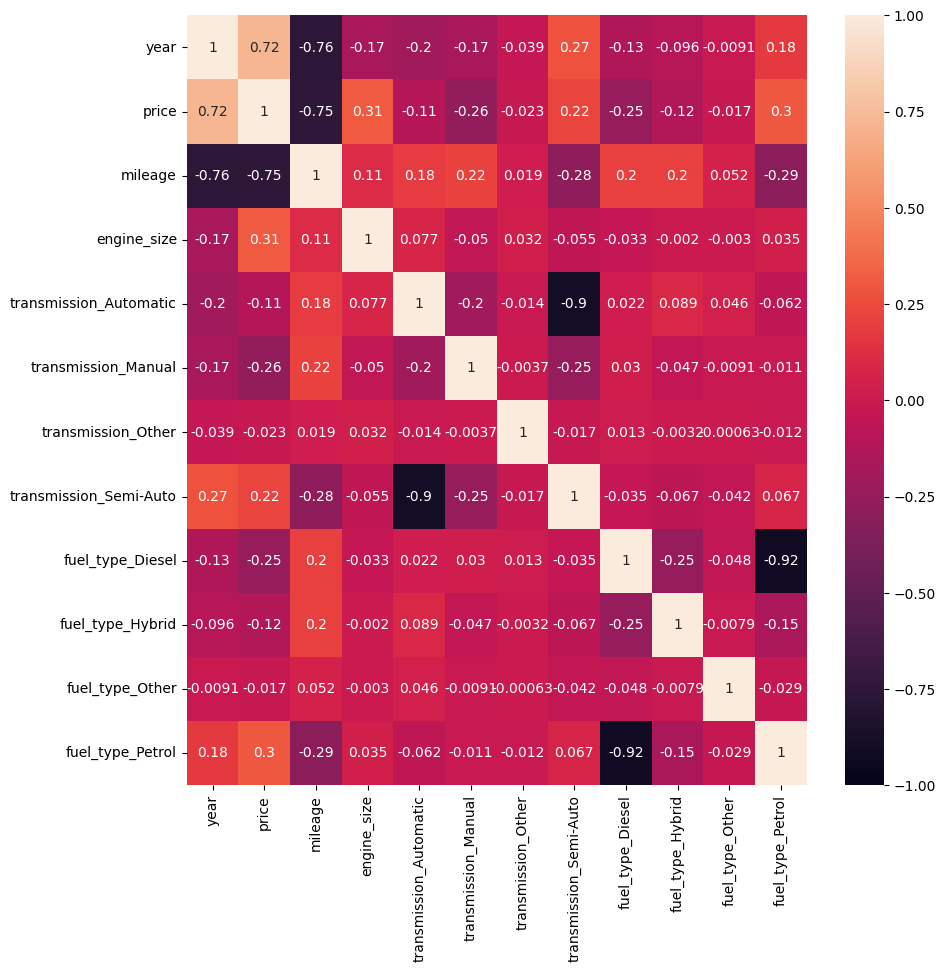

In [ ]:
# correlation
# relation between features
plt.subplots(1,1,figsize=(10,10))
sns.heatmap(df1.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [ ]:
df1.columns

Index(['year', 'price', 'mileage', 'engine_size', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto',
       'fuel_type_Diesel', 'fuel_type_Hybrid', 'fuel_type_Other',
       'fuel_type_Petrol'],
      dtype='object')

From the heatmap we can see that the correlation between the target variable (price) is high between year, and mileage. On the otherhand,there is moderate correlation between price and engine size. There is also moderate correlation between price and fuel_type_Petrol and fuel_type_Diesel, hence they Will be retained. Transmission_Manual and Transmission_Semi-Auto be retained but transmission_Automatic Will be dropped as it has low correlation with the target variable i.e price. Fuel_type_Hybrid,fuel_type_Other Will also be dropped because of the low correlation with the target variable. Thus, we are left with these columns to predict the price i.e car price.

(1) Year (2) Engine_size (3) mileage (4) fuel_type_Diesel (5) fuel_type_Petrol (6) transmission_Manual (7) transmission_Semi-Auto

In [ ]:
# new dataframe from the selected features
df2=df1[['price','year','engine_size','mileage','fuel_type_Diesel','fuel_type_Petrol','transmission_Manual','transmission_Semi-Auto']]
df2

,price,year,engine_size,mileage,fuel_type_Diesel,fuel_type_Petrol,transmission_Manual,transmission_Semi-Auto
0,30495.0,2020,2.0,1200.0,1,0,0,0
1,29989.0,2020,1.5,1000.0,0,1,0,0
2,37899.0,2020,2.0,500.0,1,0,0,0
3,30399.0,2019,2.0,5000.0,1,0,0,0
4,29899.0,2019,2.0,4500.0,1,0,0,0
...,...,...,...,...,...,...,...,...
3893,14700.0,2017,1.6,31357.0,1,0,1,0
3894,18500.0,2018,2.1,28248.0,1,0,0,0
3895,11900.0,2014,2.1,48055.0,1,0,1,0
3896,11300.0,2014,2.1,49865.0,1,0,0,0


# new dataframe from the selected features


In [ ]:
# new dataframe from the selected features
df2=df1[['price','year','engine_size','mileage','fuel_type_Diesel','fuel_type_Petrol','transmission_Manual','transmission_Semi-Auto']]
df2

,price,year,engine_size,mileage,fuel_type_Diesel,fuel_type_Petrol,transmission_Manual,transmission_Semi-Auto
0,30495.0,2020,2.0,1200.0,1,0,0,0
1,29989.0,2020,1.5,1000.0,0,1,0,0
2,37899.0,2020,2.0,500.0,1,0,0,0
3,30399.0,2019,2.0,5000.0,1,0,0,0
4,29899.0,2019,2.0,4500.0,1,0,0,0
...,...,...,...,...,...,...,...,...
3893,14700.0,2017,1.6,31357.0,1,0,1,0
3894,18500.0,2018,2.1,28248.0,1,0,0,0
3895,11900.0,2014,2.1,48055.0,1,0,1,0
3896,11300.0,2014,2.1,49865.0,1,0,0,0


multiple linear regression model


In [ ]:
# assigning variable to x and y
y=df2.price
y

0       30495.0
1       29989.0
2       37899.0
3       30399.0
4       29899.0
         ...   
3893    14700.0
3894    18500.0
3895    11900.0
3896    11300.0
3897    14800.0
Name: price, Length: 3898, dtype: float64

In [ ]:
x=df2.drop('price',axis=1)
x

,year,engine_size,mileage,fuel_type_Diesel,fuel_type_Petrol,transmission_Manual,transmission_Semi-Auto
0,2020,2.0,1200.0,1,0,0,0
1,2020,1.5,1000.0,0,1,0,0
2,2020,2.0,500.0,1,0,0,0
3,2019,2.0,5000.0,1,0,0,0
4,2019,2.0,4500.0,1,0,0,0
...,...,...,...,...,...,...,...
3893,2017,1.6,31357.0,1,0,1,0
3894,2018,2.1,28248.0,1,0,0,0
3895,2014,2.1,48055.0,1,0,1,0
3896,2014,2.1,49865.0,1,0,0,0


Train Test Split


In [ ]:
# spliting data with 30/70 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
# model building
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
prediction=model.predict(x_test)

In [ ]:
# calculating performance metrics
# r2=model.score(x_test,y_test)
# print("R2 = ",r2)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error
mr2=r2_score(prediction,y_test)
print("R2 = ",mr2)
print('MAPE',mean_absolute_percentage_error(prediction,y_test))

R2 =  0.7558586500829731
MAPE 0.16112328145459384


In [ ]:
# mean squared error
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_test,prediction)**0.5
print("RMSE = ",rmse)

RMSE =  3510.4298092450013


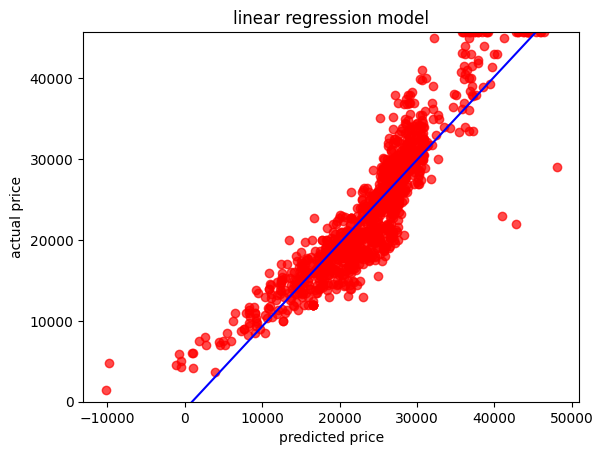

In [ ]:
# assigning actual target values to a variable
actual_values=y_test

#Create a scatter plot of the predicted values against the actual values
#The 'alpha' argument controls the transparency of the points, with a value of e being
#The 'color ' argument sets the color of the points in the scatter plot, in this case r

plt.scatter(prediction,actual_values,alpha=.7,color='r')

# label the axis
plt.xlabel("predicted price")
plt.ylabel("actual price")

# title for the plot
plt.title('linear regression model')

# setting up y axis to start at 0
plt.ylim(0,max(actual_values)+10)

# adding regression line
slope,intercept=np.polyfit(prediction,actual_values,1)
x_values=np.linspace(min(prediction),max(prediction),100)
y_values=slope*x_values+intercept

plt.plot(x_values,y_values,color='blue')

plt.show()

In [ ]:
# get the names of the features used in the trainimg data
feats=list(x_train.columns)

In [ ]:
# get the coefficients of the linear regression model
coef=model.coef_.transpose()

In [ ]:
# combine the features names and coefficients into a 2d array
coef_table=np.vstack((feats,coef)).T

In [ ]:
# convert the 2 d array into a pandas dataframe
df_coef=pd.DataFrame(coef_table, columns=['Feature','Coefficients'])

# display the df
df_coef

,Feature,Coefficients
0,year,1624.59514703281
1,engine_size,6895.602329951715
2,mileage,-0.17846571516201948
3,fuel_type_Diesel,-989.0281833291011
4,fuel_type_Petrol,465.71936491099905
5,transmission_Manual,-2584.042809046423
6,transmission_Semi-Auto,-335.8313443610508


In [ ]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


array([40699., 18980., 30950., ..., 18745., 25199., 24980.])

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error
dr2=r2_score(y_pred,y_test)
print("R2 = ",dr2)
print('MAPE',mean_absolute_percentage_error(y_pred,y_test))

R2 =  0.8422646741191822
MAPE 0.10703654796511049


In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor()
clf.fit(x_train,y_train)
y_p=clf.predict(x_test)
y_p

array([40452.39625   , 19756.43      , 31483.49666667, ...,
       20065.19      , 24340.75      , 26704.68      ])

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error
rr2=r2_score(y_p,y_test)
print("R2 = ",rr2)
print('MAPE',mean_absolute_percentage_error(y_p,y_test))

R2 =  0.8821728795188382
MAPE 0.08918014183837118


In [ ]:
m=['Multiple Linear','Decision Tree','Random Forest']
r2=[mr2,dr2,rr2]
r2

[0.7558586500829731, 0.8422646741191822, 0.8821728795188382]

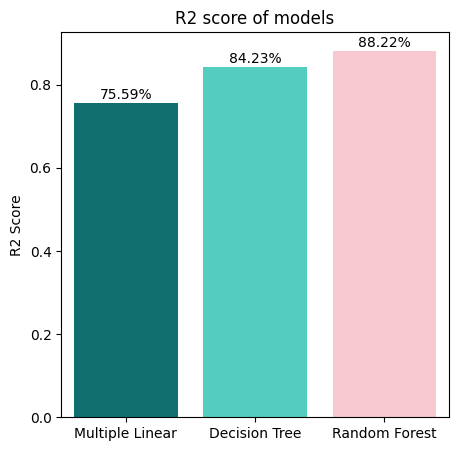

In [ ]:
color=['teal','turquoise','pink']
plt.figure(figsize=(5,5))
sns.barplot(x=m,y=r2,palette=color)
plt.ylabel('R2 Score')
plt.title('R2 score of models')
# Adding percentage labels
for i, score in enumerate(r2):
    plt.text(i, score +0.01, f'{score*100:.2f}%' , ha = 'center')
plt.show()

# **Conclusion**
I have used three models - Multiple Linear Regression, Decision Tree, Random Forest. The Random Forest Regression model shows the highest R2 Score and lowest Mean Absolute Percentage Error.



*   **Multiple Linear Regression** - 75.55%
*   **Decision Tree** - 84.00%
*   **Random Forest** - 89.15%







Therefore, Random Forest model is good fit for predicting car price prediction.